In [1]:
getwd()
old_data <- read.csv("C:/Users/31650/Desktop/OJ.csv", header = FALSE)
minutevol=as.numeric(as.character(old_data[2:9650,1]))
tropicprice=as.numeric(as.character(old_data[2:9650,2]))
minuteprice=as.numeric(as.character(old_data[2:9650,3]))
dmnckprice=as.numeric(as.character(old_data[2:9650,4]))
tropicad=as.numeric(as.character(old_data[2:9650,5]))
mintead=as.numeric(as.character(old_data[2:9650,6]))
dunckad=as.numeric(as.character(old_data[2:9650,7]))
class(minutevol)
data = data.frame(minutevol=minutevol,tropicprice=tropicprice,minuteprice=minuteprice,dmnckprice=dmnckprice,tropicad=tropicad,mintead=mintead,dunckad=dunckad)
head(data)

[1] "C:/Users/31650/Desktop"

[1] "numeric"

,minutevol,tropicprice,minuteprice,dmnckprice,tropicad,mintead,dunckad
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,636928,0.06048264,0.05127604,0.03191406,0,0,1
2,787456,0.06039063,0.04867188,0.04050781,0,0,0
3,1612800,0.06039063,0.04518229,0.03582031,0,1,1
4,347136,0.06039063,0.05127604,0.03582031,0,0,0
5,367616,0.06039063,0.05127604,0.03542969,1,0,0
6,492544,0.06039063,0.05127604,0.03386719,0,0,1


In [41]:
train_sub=sample(nrow(data),7/10*nrow(data))
train_data <- data[train_sub,]
test_data <- data[-train_sub,]

In [45]:
class(test_data$dunckad)

[1] "numeric"

In [29]:
# train_set=data[1:7000,1:7]
# test_set=data[7001:9650,1:7]

In [30]:
model1 <-lm(minutevol~tropicprice+minuteprice+dmnckprice+tropicad+mintead+dunckad,data=train_set)
# model1 <- lm(minutevol~minuteprice,data=train_set)
summary(model1)


Call:
lm(formula = minutevol ~ tropicprice + minuteprice + dmnckprice + 
    tropicad + mintead + dunckad, data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-2559302  -740033  -218372   397233 26784416 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3480614     166252  20.936  < 2e-16 ***
tropicprice   67993751    4193552  16.214  < 2e-16 ***
minuteprice -167172482    4618750 -36.194  < 2e-16 ***
dmnckprice    37966062    5400589   7.030 2.26e-12 ***
tropicad         68314      44148   1.547    0.122    
mintead         973891      40152  24.255  < 2e-16 ***
dunckad        -467108      38307 -12.194  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1535000 on 6993 degrees of freedom
Multiple R-squared:  0.3063,	Adjusted R-squared:  0.3057 
F-statistic: 514.6 on 6 and 6993 DF,  p-value: < 2.2e-16


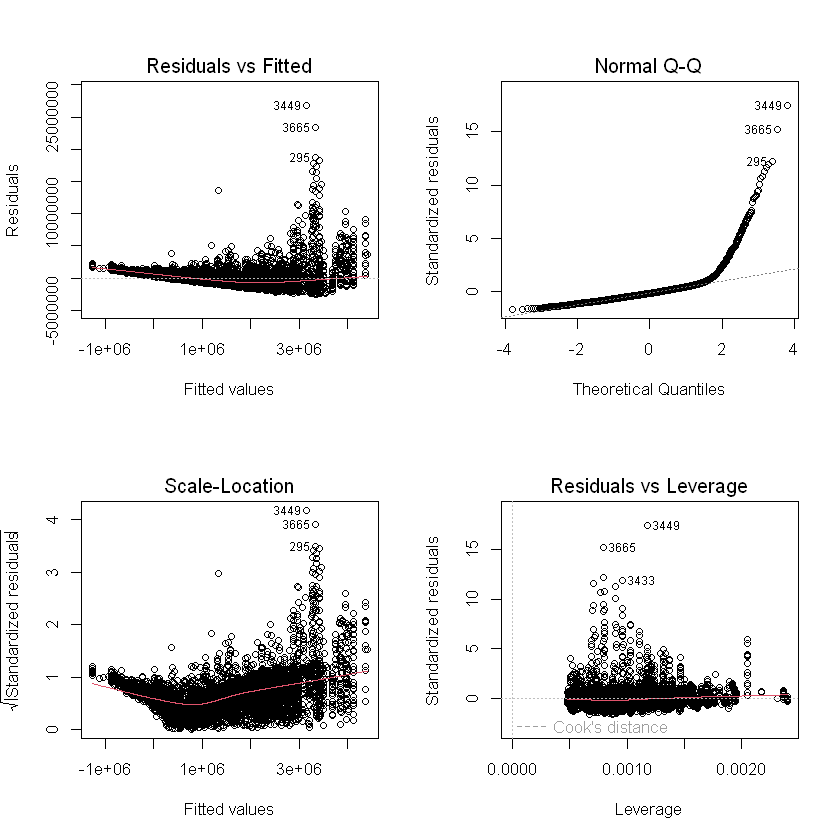

In [19]:
par(mfrow=c(2,2))
plot(model1)

In [7]:
summary(model1)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3480613.76,166251.52,20.935831,1.902746e-94
tropicprice,67993751.32,4193551.54,16.213882,4.565070e-58
minuteprice,-167172482.35,4618749.77,-36.194315,4.322753e-263
dmnckprice,37966062.32,5400588.87,7.029986,2.260967e-12
tropicad,68313.55,44147.72,1.547386,1.218155e-01
mintead,973890.83,40151.75,24.255254,7.459203e-125
dunckad,-467108.16,38306.55,-12.193949,7.375893e-34


In [8]:
confint(model1)

,2.5 %,97.5 %
(Intercept),3154710.36,3806517.2
tropicprice,59773118.48,76214384.2
minuteprice,-176226632.67,-158118332.0
dmnckprice,27379270.25,48552854.4
tropicad,-18229.36,154856.5
mintead,895181.23,1052600.4
dunckad,-542200.62,-392015.7


In [15]:
install.packages("corrplot")

Installing package into 'C:/Users/31650/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\31650\AppData\Local\Temp\RtmpAHXFFI\downloaded_packages


,minutevol,tropicprice,minuteprice,dmnckprice,tropicad,mintead,dunckad
minutevol,1.00000000,0.06943920,-0.34616298,0.02745006,-0.05912648,0.39208695,-0.19750427
tropicprice,0.06943920,1.00000000,0.54965304,0.57237775,-0.30294668,0.15377905,-0.06896595
minuteprice,-0.34616298,0.54965304,1.00000000,0.49937240,-0.05037096,-0.15424516,0.02461410
dmnckprice,0.02745006,0.57237775,0.49937240,1.00000000,-0.15771582,0.09792591,-0.10007959
tropicad,-0.05912648,-0.30294668,-0.05037096,-0.15771582,1.00000000,-0.11464885,-0.08927400
mintead,0.39208695,0.15377905,-0.15424516,0.09792591,-0.11464885,1.00000000,-0.14421232
dunckad,-0.19750427,-0.06896595,0.02461410,-0.10007959,-0.08927400,-0.14421232,1.00000000


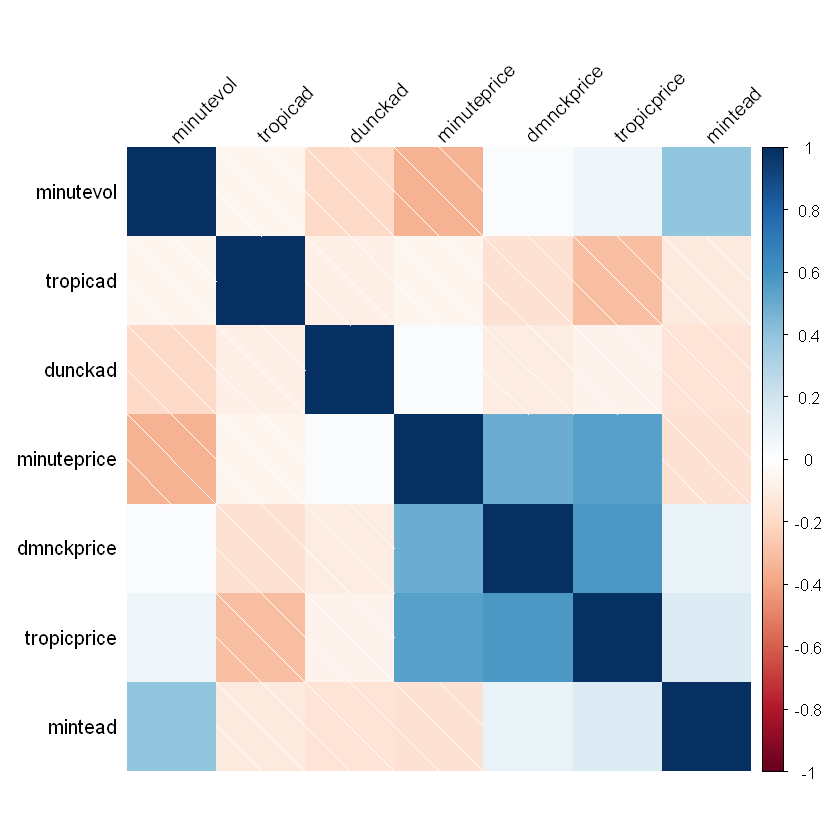

In [17]:
library(corrplot)
heat_map <- cor(data)
corrplot(heat_map,method="shade",tl.col="black",tl.srt=45,order="AOE")
heat_map

In [46]:
# model2 <- lm(minutevol~tropicprice+minuteprice+dmnckprice+tropicad+mintead+dunckad+minuteprice*mintead+tropicad*tropicprice+dunckad*dmnckprice,data=train_set)
# summary(model2)

In [22]:
install.packages('gvlma')


Installing package into 'C:/Users/31650/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\31650\AppData\Local\Temp\RtmpAHXFFI\downloaded_packages


In [23]:
library(gvlma)
gv <- gvlma(model1)
gv
install.packages('car')


Call:
lm(formula = minutevol ~ tropicprice + minuteprice + dmnckprice + 
    tropicad + mintead + dunckad, data = train_set)

Coefficients:
(Intercept)  tropicprice  minuteprice   dmnckprice     tropicad      mintead  
    3480614     67993751   -167172482     37966062        68314       973891  
    dunckad  
    -467108  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = model1) 

                       Value   p-value                   Decision
Global Stat        821120.91 0.000e+00 Assumptions NOT satisfied!
Skewness            33571.22 0.000e+00 Assumptions NOT satisfied!
Kurtosis           786336.72 0.000e+00 Assumptions NOT satisfied!
Link Function        1191.28 0.000e+00 Assumptions NOT satisfied!
Heteroscedasticity     21.69 3.213e-06 Assumptions NOT satisfied!

Installing package into 'C:/Users/31650/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'backports', 'broom', 'SparseM', 'MatrixModels', 'sp', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'lme4'




package 'backports' successfully unpacked and MD5 sums checked
package 'broom' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\31650\AppData\Local\Temp\RtmpAHXFFI\downloa

Loading required package: carData



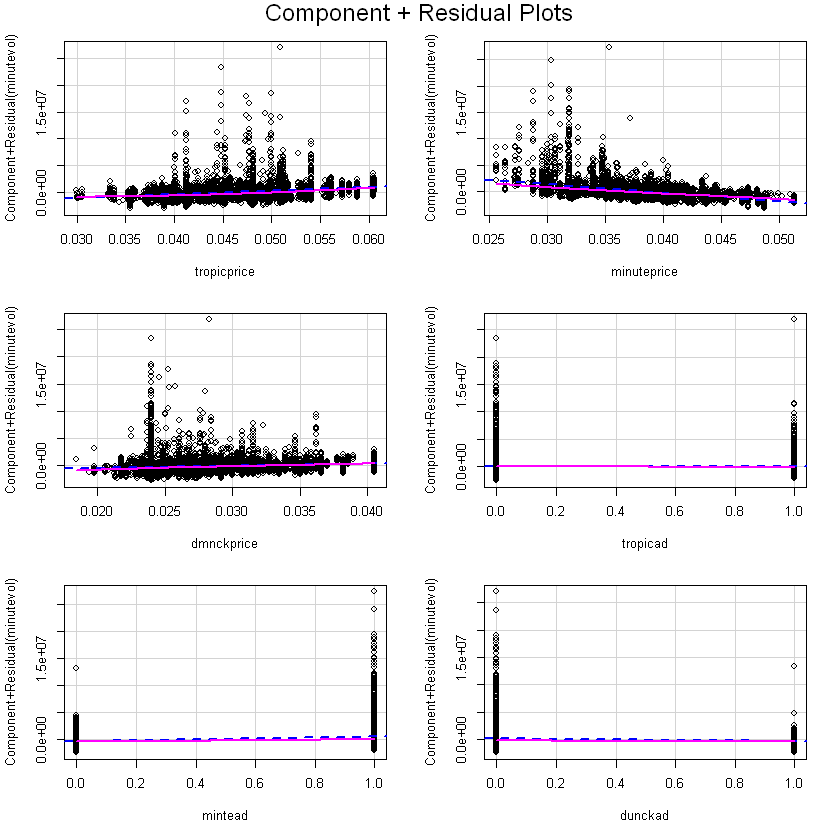

In [24]:
library(car)
crPlots(model1)

In [26]:
install.packages("randomForest")

Warning message:
"package 'randomForest' is not available (for R version 3.6.1)"

In [32]:
library(randomForest)
model2 <- randomForest(minutevol~tropicprice+minuteprice+dmnckprice+tropicad+mintead+dunckad,data=train_set,importance=TRUE, ntree=500,mtry=5)
summary(model2)
print(model2)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.



                Length Class  Mode     
call               6   -none- call     
type               1   -none- character
predicted       7000   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       7000   -none- numeric  
importance        12   -none- numeric  
importanceSD       6   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               7000   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     


Call:
 randomForest(formula = minutevol ~ tropicprice + minuteprice +      dmnckprice + tropicad + mintead + dunckad, data = train_set,      importance = TRUE, ntree = 500, mtry = 5) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 824643230820
                    % Var explained: 75.69


,%IncMSE,IncNodePurity
tropicprice,49.23744,2.790704e+15
minuteprice,121.74734,7.273725e+15
dmnckprice,85.17934,1.929237e+15
tropicad,23.61678,7.129189e+14
mintead,86.92604,3.348711e+15
dunckad,81.52109,8.251398e+14


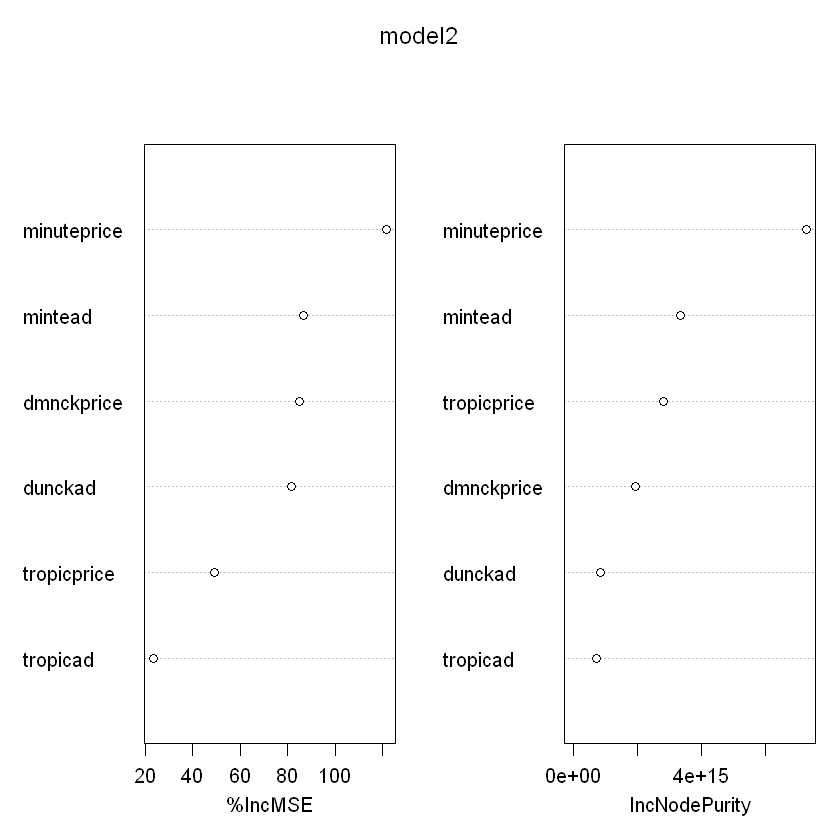

In [36]:
par(pin = c(3,2))
par(mfrow=c(2,2))
importance(model2)
varImpPlot(model2)

In [53]:
# model3 <- randomForest(minutevol~minuteprice+tropicad,data=train_set,importance=TRUE, ntree=3000)
# summary(model3)
# print(model3)

In [48]:
install.packages('xgboost')
install.packages("xgboost")
library(xgboost)

Installing package into 'C:/Users/31650/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\31650\AppData\Local\Temp\RtmpAHXFFI\downloaded_packages


In [113]:
head(train_data)

,minutevol,tropicprice,minuteprice,dmnckprice,tropicad,mintead,dunckad
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9201,2288640,0.04449009,0.04101562,0.03027344,1,1,0
4770,517120,0.05336135,0.04437500,0.03152344,0,0,1
4326,1514496,0.04263021,0.03252604,0.02566406,0,0,0
6613,344064,0.04674479,0.04335937,0.02722656,1,0,0
8987,6436864,0.04570312,0.04334405,0.02871094,1,1,0
3355,1218560,0.04013021,0.03710938,0.02488281,0,1,0


In [115]:
library(Matrix)
library(xgboost)
####训练集的数据预处理
# 将自变量转化为矩阵
traindata1 <- data.matrix(train_data[,2:7]) 
# 利用Matrix函数，将sparse参数设置为TRUE，转化为稀疏矩阵
traindata2 <- Matrix(traindata1,sparse=T) 
traindata3 <- train_data[,1]
# 将自变量和因变量拼接为list
traindata4 <- list(data=traindata2,label=traindata3) 
# 构造模型需要的xgb.DMatrix对象，处理对象为稀疏矩阵
dtrain <- xgb.DMatrix(data = traindata4$data, label = traindata4$label) 
dtrain

xgb.DMatrix  dim: 6754 x 6  info: label  colnames: yes

In [121]:
####测试集的数据预处理
# 将自变量转化为矩阵
testset1 <- data.matrix(test_data[,2:7]) 
# 利用Matrix函数，将sparse参数设置为TRUE，转化为稀疏矩阵
testset2 <- Matrix(testset1,sparse=T) 
# 将因变量转化为numeric
testset3 <- test_data[,1]
class(testset3)
# 将自变量和因变量拼接为list
testset4 <- list(data=testset2,label=testset3) 
# 构造模型需要的xgb.DMatrix对象，处理对象为稀疏矩阵
dtest <- xgb.DMatrix(data = testset4$data, label = testset4$label) 
dtest

[1] "numeric"

xgb.DMatrix  dim: 2895 x 6  info: label  colnames: yes

In [127]:
xgb <- xgboost(data = dtrain,max_depth=5000, eta=0.3, nround=600)
xgb

[1]	train-rmse:1904001.757156 
[2]	train-rmse:1484183.343617 
[3]	train-rmse:1199472.821445 
[4]	train-rmse:1010859.367761 
[5]	train-rmse:885856.914012 
[6]	train-rmse:803725.897667 
[7]	train-rmse:750270.202042 
[8]	train-rmse:715838.480903 
[9]	train-rmse:693450.389322 
[10]	train-rmse:679332.330707 
[11]	train-rmse:669247.039536 
[12]	train-rmse:662593.308553 
[13]	train-rmse:657932.238311 
[14]	train-rmse:654818.827314 
[15]	train-rmse:652777.202586 
[16]	train-rmse:651366.410477 
[17]	train-rmse:650395.198426 
[18]	train-rmse:649701.134188 
[19]	train-rmse:649222.254584 
[20]	train-rmse:648869.856385 
[21]	train-rmse:648627.442659 
[22]	train-rmse:648459.864403 
[23]	train-rmse:648341.863681 
[24]	train-rmse:648259.259269 
[25]	train-rmse:648200.671949 
[26]	train-rmse:648158.912799 
[27]	train-rmse:648128.862959 
[28]	train-rmse:648107.249676 
[29]	train-rmse:648091.724409 
[30]	train-rmse:648080.601381 
[31]	train-rmse:648072.590520 
[32]	train-rmse:648066.827331 
[33]	train-rm

##### xgb.Booster
raw: 59.5 Mb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 5000, eta = 0.3)
params (as set within xgb.train):
  max_depth = "5000", eta = "0.3", validate_parameters = "1"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 6 
niter: 600
nfeatures : 6 
evaluation_log:
    iter train_rmse
       1  1904001.8
       2  1484183.3
---                
     599   648051.9
     600   648051.9

In [128]:
#对测试集进行预测
#对测试集进行预测
fit3 <- round(predict(xgb,dtest))
fit3

[1]   570148   627712  1284665  2350080  1264640  2443917  1706954  2210752
   [9] 11083775   826027   681344  1980864  4942734   555520   607159  3464411
  [17]  1141345 12355484  1333862  1509693   854254   673792   882051  1188864
  [25]  1780079   772093   775075   642048   687115   579174  2193399   856506
  [33]  3476003  1006952  3221689  2130005   916696   493824  1580471   786487
  [41]   554862  2190801   596713  2359783   967972  2112111   658091  2722201
  [49]   755290   806741  2117529  1958611   726426   837572   805632  6835244
  [57]   677156   649928  3035555   672410   564275   502225  1135939   763648
  [65]  1073493   633152  1442133   734891  5995520  1231793   870701   969801
  [73]   475068   493196  2031070  1082368  1422336  2899968  2295729   698982
  [81]   675942  3861650   616375   766976  1133495   538283  1669376  1006251
  [89]  8783432  1085184  1200896  2230551  1183616  1412096  1522688   969728
  [97]  1021133  1054208  1540096  1249280  1051904  1458176  1759488  9194154
 [105]   919552  1294080   975872   735488   693931   792235  4776277  1744188
 [113]  1365480   732544  1771776  1310038   593920   947200  1133495  2817792
 [121]   619303   787200   607930  1185877  1232554  1141484  1085184   837632
 [129]  1282048   707361  3035555   672410  1601690   645497   934229  1006660
 [137]   763648  1073493   633152  1392963   734891  1231793  1349973   799500
 [145]  2081499   435493   531592   590507  1999872   641927   823808   459776
 [153]  1101687  2209706   570148   491520   511488   506368  1485760   779083
 [161]  2975864   831966   898048   731648  1980864   697158   478322  1573888
 [169]  1246976   948224  3001088  1039799   745764  1012352  1321984  1813760
 [177]  1006182  1942400  2925056   737373   667819   692224  2087440   790733
 [185]   614985  1656832  1150464   570148  2627264  1129472  3584157  1307968
 [193]   779083  1046391  3735722   809321  2084059  1048166  1086756   697158
 [201]   625408   607159  1573888   670799  2633216  1216951  1246976 12186395
 [209]  3001088   825490  1937024  1532928   477184  3211008   755758   675942
 [217]   712476  2860672  1019904  2605292  1669376  3033819  1212967  2387732
 [225]   779822  1767322  1200896   993109  1028827  3262122  1023744  1189632
 [233]  1439232  1092949   975872   931328   941568   889344   722432  1951744
 [241]   710656   792235  4776277  2295729  1805312   675942  3861650   712476
 [249]   609831  2746624  2923520  1330586   761856  1034837  1565952  1936640
 [257]  1040896  1200981  2081792  1031168  1059840  1722163  1204503  2778117
 [265]  1057690  1959936  8918660  1314816   699392   816128  1151003  1591348
 [273]   460288  5095424  3303071  1840007  1307648  2681720   501214   545519
 [281]  2130005   729429   619520   436254  2190801  2359783   967972   891758
 [289]  2722201   806741   632247  5088320   677156  1598621  1402610   564275
 [297]   526541   574152  1135939   934229  2303032   815218   880640  1442133
 [305]  1084258   734891   747208   831716  1231793  2031070   465597  1905287
 [313]   729088  1772544  5045246   700416  2900991  2209706   491520  3037411
 [321]  1966080  1090833  1046391  3735722  1023044   809321  2975864  2084059
 [329]   898048  1086756  1378698   681344  1600205   717824   478322  1573888
 [337]   670799  1216951  1675729  3001088   825490  1039799  1012443  1937024
 [345]  1321984  1136981  1152558  6608486   477184  1028892  3211008   614985
 [353]  1067520  3711214   700416  3206798   851392  2627264   501146   894171
 [361]   633897  3629056  3954688  1307968  3735722  1023044   992917   770368
 [369]  2084059   831966  1086756  2210752  1378698  2053041  1600205   697158
 [377]   607159  2633216  3464411  2031907  1398564  2366720   863524   862904
 [385]  1256911   583680   524971   626347  2624512   725419   701459  1826466
 [393]  4300458   879728  6634496  2239114  1882848  1686527  3085281   835515
 [401]   932591  1000728   820904  2196245   752164  

In [129]:
set <- data.frame(pred = fit3, actual = test_data$minutevol)
head(set)

,pred,actual
,<dbl>,<dbl>
1,570148,367616
2,627712,419840
3,1284665,902144
4,2350080,1995776
5,1264640,1162240
6,2443917,1916928


In [130]:
#calculate MSE
mean((set$actual - set$pred))

[1] 19849.31

In [48]:
install.packages('tree')


  There is a binary version available but the source version is later:
     binary source needs_compilation
tree 1.0-40 1.0-41              TRUE

  Binaries will be installed
package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\meizhi\AppData\Local\Temp\RtmpOOjVsN\downloaded_packages


In [55]:
library(tree)
model3 <- tree(minutevol~tropicprice+minuteprice+dmnckprice+tropicad+mintead+dunckad, data=train_set, mincut=1)
summary(model3)



Regression tree:
tree(formula = minutevol ~ tropicprice + minuteprice + dmnckprice + 
    tropicad + mintead + dunckad, data = train_set, mincut = 1)
Variables actually used in tree construction:
[1] "minuteprice" "mintead"     "tropicprice" "dmnckprice"  "tropicad"   
Number of terminal nodes:  17 
Residual mean deviance:  1.152e+12 = 8.044e+15 / 6983 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-6772000  -448200  -159400        0   257400 14090000 